In [2]:
import numpy as np
import qutip
import networkx

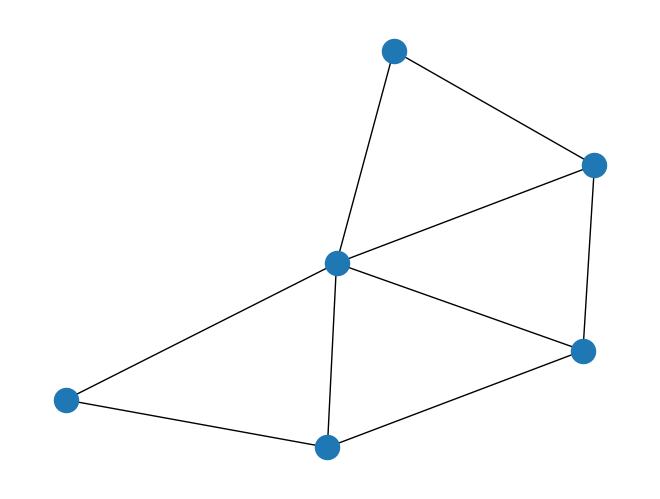

In [9]:
graph = networkx.triangular_lattice_graph(2, 2)
networkx.draw(graph)

In [13]:
list(graph.adjacency())

[((0, 0), {(1, 0): {}, (0, 1): {}}),
 ((1, 0), {(0, 0): {}, (1, 1): {}, (0, 1): {}}),
 ((0, 1), {(1, 1): {}, (0, 0): {}, (0, 2): {}, (1, 2): {}, (1, 0): {}}),
 ((1, 1), {(0, 1): {}, (1, 0): {}, (1, 2): {}}),
 ((0, 2), {(1, 2): {}, (0, 1): {}}),
 ((1, 2), {(0, 2): {}, (1, 1): {}, (0, 1): {}})]

In [ ]:
def form_triangular_hexagon(

In [ ]:
def form_triangular_lattice_adjacency(t):
    """
    Form hexagonal lattice built of
    triangular lattice.
    
    [t] -- number of triangles
    """
    
        

In [30]:
def build_triangular_chain_dict(t):
    """
    Builds a chain of [t]
    triangular plaquettes.
    """
    n = t + 2
    adj_dict = {}
    for i in range(n - 1):
        if i < n - 2:
            adj_dict[(i, i + 1)] = 1
            adj_dict[(i, i + 2)] = 1
        else:
            adj_dict[(i, i + 1)] = 1
            
    return adj_dict

In [32]:
build_triangular_chain_dict(2)

{(0, 1): 1, (0, 2): 1, (1, 2): 1, (1, 3): 1, (2, 3): 1}

In [ ]:
def build_hexagonal_chain_dict(h):
    """
    Builds a chain with [h] hexagonal
    plaquettes.
    """
    # compute number of triangles and qubits
    t = 4 * h + 2
    n = t + 2
    

In [86]:
def qubit_count(m, n):
    """
    Gets number of qubits in [n] x [m]
    grid of hexagons.
    """
    return (2 * m + 1) * (n + 2) - (m + 1)


def form_occupancy_matrix(m, n):
    """
    Forms matrix with 1 if a qubit is in position
    (i, j) and 0 if not.
    """
    occ_mat = np.ones((2 * m + 1, n + 2))
    for j in range(0, 2 * m + 1, 2):
        occ_mat[j][n + 2 - 1] = 0
    
    return occ_mat

def build_hexagonal_grid_dict(m, n):
    """
    Inputs
    --------------------------------
    m -- number hexagonal rows
    n -- number of hexagonal columns
    
    Returns
    --------------------------------
    occ_mat -- a matrix specifiying occupancy of qubits
    adj_dict -- dictionary specyfing unique connections
    """
    occ_mat = form_occupancy_matrix(m, n)
    r, c = occ_mat.shape
    
    adj_dict = {}
    for i in range(r):
        for j in range(c):
            neighbors = []
            # make sure a qubit is actually there
            if occ_mat[i, j] != 0:
                # last row is easy
                if i == r - 1:
                    if j < r - 1:
                        neighbors.append((i, j + 1))
                # for even rows before the end
                elif i % 2 == 0 and i < r - 1:
                    neighbors.append((i + 1, j))
                    neighbors.append((i + 1, j + 1))
                    if j < c - 2:
                        neighbors.append((i, j + 1))
                # for odd rows
                else:
                    # last column is easy
                    if j == c - 1:
                        neighbors.append((i + 1, j - 1))
                    elif j == 0:
                        neighbors.append((i + 1, j))
                        neighbors.append((i, j + 1))
                    else:
                        neighbors.append((i + 1, j - 1))
                        neighbors.append((i + 1, j))
                        neighbors.append((i, j + 1))

            adj_dict[(i, j)] = neighbors

            
    return occ_mat, adj_dict

In [87]:
build_hexagonal_grid_dict(2, 4)

(array([[1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 0.]]),
 {(0, 0): [(1, 0), (1, 1), (0, 1)],
  (0, 1): [(1, 1), (1, 2), (0, 2)],
  (0, 2): [(1, 2), (1, 3), (0, 3)],
  (0, 3): [(1, 3), (1, 4), (0, 4)],
  (0, 4): [(1, 4), (1, 5)],
  (0, 5): [],
  (1, 0): [(2, 0), (1, 1)],
  (1, 1): [(2, 0), (2, 1), (1, 2)],
  (1, 2): [(2, 1), (2, 2), (1, 3)],
  (1, 3): [(2, 2), (2, 3), (1, 4)],
  (1, 4): [(2, 3), (2, 4), (1, 5)],
  (1, 5): [(2, 4)],
  (2, 0): [(3, 0), (3, 1), (2, 1)],
  (2, 1): [(3, 1), (3, 2), (2, 2)],
  (2, 2): [(3, 2), (3, 3), (2, 3)],
  (2, 3): [(3, 3), (3, 4), (2, 4)],
  (2, 4): [(3, 4), (3, 5)],
  (2, 5): [],
  (3, 0): [(4, 0), (3, 1)],
  (3, 1): [(4, 0), (4, 1), (3, 2)],
  (3, 2): [(4, 1), (4, 2), (3, 3)],
  (3, 3): [(4, 2), (4, 3), (3, 4)],
  (3, 4): [(4, 3), (4, 4), (3, 5)],
  (3, 5): [(4, 4)],
  (4, 0): [(4, 1)],
  (4, 1): [(4, 2)],
  (4, 2): [(4, 3)],
  (4, 3): [(

In [60]:
occ_mat = form_occupancy_matrix(2, 4)
occ_mat

array([[1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0.]])

In [73]:
r

5

In [83]:
r, c = occ_mat.shape
for i in range(r):
    for j in range(c):
        neighbors = []
        # make sure a qubit is actually there
        if occ_mat[i, j] != 0:
            # last row is easy
            if i == r - 1:
                if j < r - 1:
                    neighbors.append((i, j + 1))
            # for even rows before the end
            elif i % 2 == 0 and i < r - 1:
                neighbors.append((i + 1, j))
                neighbors.append((i + 1, j + 1))
                if j < c - 2:
                    neighbors.append((i, j + 1))
            # for odd rows
            else:
                # last column is easy
                if j == c - 1:
                    neighbors.append((i + 1, j + 1))
                elif j == 0:
                    neighbors.append((i + 1, j))
                    neighbors.append((i, j + 1))
                else:
                    neighbors.append((i + 1, j - 1))
                    neighbors.append((i + 1, j))
                    neighbors.append((i, j + 1))
        print(i, j, neighbors)

0 0 [(1, 0), (1, 1), (0, 1)]
0 1 [(1, 1), (1, 2), (0, 2)]
0 2 [(1, 2), (1, 3), (0, 3)]
0 3 [(1, 3), (1, 4), (0, 4)]
0 4 [(1, 4), (1, 5)]
0 5 []
1 0 [(2, 0), (1, 1)]
1 1 [(2, 0), (2, 1), (1, 2)]
1 2 [(2, 1), (2, 2), (1, 3)]
1 3 [(2, 2), (2, 3), (1, 4)]
1 4 [(2, 3), (2, 4), (1, 5)]
1 5 [(2, 6)]
2 0 [(3, 0), (3, 1), (2, 1)]
2 1 [(3, 1), (3, 2), (2, 2)]
2 2 [(3, 2), (3, 3), (2, 3)]
2 3 [(3, 3), (3, 4), (2, 4)]
2 4 [(3, 4), (3, 5)]
2 5 []
3 0 [(4, 0), (3, 1)]
3 1 [(4, 0), (4, 1), (3, 2)]
3 2 [(4, 1), (4, 2), (3, 3)]
3 3 [(4, 2), (4, 3), (3, 4)]
3 4 [(4, 3), (4, 4), (3, 5)]
3 5 [(4, 6)]
4 0 [(4, 1)]
4 1 [(4, 2)]
4 2 [(4, 3)]
4 3 [(4, 4)]
4 4 []
4 5 []


In [54]:
for i in range(5):
    for j in range(5):
        print(i, j)
        neighbors = []
        if j + 1 < 5:
            n1 = (i, j + 1)
            neighbors.append(n1)
        if i + 1 < 5:
            n2 = (i + 1, j)
            neighbors.append(n2)
        if not (i % 2 == 1 and j == 0):
            n3 = (i + 1, j + 1)
            neighbors.append(n3)
        print(neighbors)

0 0
[(0, 1), (1, 0), (1, 1)]
0 1
[(0, 2), (1, 1), (1, 2)]
0 2
[(0, 3), (1, 2), (1, 3)]
0 3
[(0, 4), (1, 3), (1, 4)]
0 4
[(1, 4), (1, 5)]
1 0
[(1, 1), (2, 0)]
1 1
[(1, 2), (2, 1), (2, 2)]
1 2
[(1, 3), (2, 2), (2, 3)]
1 3
[(1, 4), (2, 3), (2, 4)]
1 4
[(2, 4), (2, 5)]
2 0
[(2, 1), (3, 0), (3, 1)]
2 1
[(2, 2), (3, 1), (3, 2)]
2 2
[(2, 3), (3, 2), (3, 3)]
2 3
[(2, 4), (3, 3), (3, 4)]
2 4
[(3, 4), (3, 5)]
3 0
[(3, 1), (4, 0)]
3 1
[(3, 2), (4, 1), (4, 2)]
3 2
[(3, 3), (4, 2), (4, 3)]
3 3
[(3, 4), (4, 3), (4, 4)]
3 4
[(4, 4), (4, 5)]
4 0
[(4, 1), (5, 1)]
4 1
[(4, 2), (5, 2)]
4 2
[(4, 3), (5, 3)]
4 3
[(4, 4), (5, 4)]
4 4
[(5, 5)]
